TESTE:
# T√≠tulo Grande
## Subt√≠tulo
**Negrito** e *it√°lico*  
- Lista de itens
- Outro item
1. Lista numerada
2. Segundo item
[Link para o Google](https://www.google.com)

# An√°lise Explorat√≥ria dos Dados (EDA)

Inicialmente, foi realizada a leitura do dataset para iniciar a an√°lise dos dados e examinar o conjunto de vari√°veis dispon√≠veis.

O dataset cont√©m diversas informa√ß√µes relevantes, como o pre√ßo por noite do aluguel, o tipo de espa√ßo, a localiza√ß√£o, a disponibilidade anual do quarto, o n√∫mero m√≠nimo de noites para reserva e a quantidade de avalia√ß√µes. Esses dados s√£o fundamentais para auxiliar o cliente na escolha do local ideal.

Al√©m disso, o dataset tamb√©m inclui informa√ß√µes relacionadas √† identifica√ß√£o do an√∫ncio na plataforma e sobre o Host, como os IDs, o nome do Host e o t√≠tulo do an√∫ncio. Esses detalhes podem ser √∫teis para entender melhor a origem dos dados e a rela√ß√£o entre os an√∫ncios e seus respectivos hosts.

In [7]:
# Bibliotecas
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import geodatasets as gds
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

C:\Users\DaniloDC\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [8]:
# Leitura do DataSet & Dicionario de informa√ß√µes
help = {'id': 'Atua como uma chave exclusiva para cada an√∫ncio nos dados do aplicativo',
        'nome': 'Representa o nome do an√∫ncio',
        'host_id': 'Representa o id do usu√°rio que hospedou o an√∫ncio',
        'host_name': 'Cont√©m o nome do usu√°rio que hospedou o an√∫ncio',
        'bairro_group': 'Cont√©m o nome do bairro onde o an√∫ncio est√° localizado',
        'bairro': 'Cont√©m o nome da √°rea onde o an√∫ncio est√° localizado',
        'latitude': 'Cont√©m a latitude do local',
        'longitude': 'Cont√©m a longitude do local',
        'room_type': 'Cont√©m o tipo de espa√ßo de cada an√∫ncio',
        'price': 'Cont√©m o pre√ßo por noite em d√≥lares listado pelo anfitri√£o',
        'minimo_noites':'Cont√©m o n√∫mero m√≠nimo de noites que o usu√°rio deve reservar',
        'numero_de_reviews': 'Cont√©m o n√∫mero de coment√°rios dados a cada listagem',
        'ultima_review': 'Cont√©m a data da √∫ltima revis√£o dada √† listagem',
        'reviews_por_mes': 'Cont√©m o n√∫mero de avalia√ß√µes fornecidas por m√™s',
        'calculado_host_listings_count': 'Cont√©m a quantidade de listagem por host',
        'disponibilidade_365': 'Cont√©m o n√∫mero de dias em que o an√∫ncio est√° dispon√≠vel para reserva'}

df = pd.read_csv('teste_indicium_precificacao.csv')
df.head(20)

id                                              nome  host_id  \
0   2595                             Skylit Midtown Castle     2845   
1   3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
2   3831                   Cozy Entire Floor of Brownstone     4869   
3   5022  Entire Apt: Spacious Studio/Loft by central park     7192   
4   5099         Large Cozy 1 BR Apartment In Midtown East     7322   
5   5121                                   BlissArtsSpace!     7356   
6   5178                  Large Furnished Room Near B'way      8967   
7   5203                Cozy Clean Guest Room - Family Apt     7490   
8   5238                Cute & Cozy Lower East Side 1 bdrm     7549   
9   5295                  Beautiful 1br on Upper West Side     7702   
10  5441                   Central Manhattan/near Broadway     7989   
11  5803    Lovely Room 1, Garden, Best Area, Legal rental     9744   
12  6021  Wonderful Guest Bedroom in Manhattan for SINGLES    11528   
13  6090                     West Village Nest - Superhost    11975   
14  6848                  Only 2 stops to Manhattan studio    15991   
15  7097                 Perfect for Your Parents + Garden    17571   
16  7322                                   Chelsea Perfect    18946   
17  7726   Hip Historic Brownstone Apartment with Backyard    20950   
18  7750                 Huge 2 BR Upper East  Cental Park    17985   
19  7801                  Sweet and Spacious Brooklyn Loft    21207   

           host_name bairro_group              bairro  latitude  longitude  \
0           Jennifer    Manhattan             Midtown  40.75362  -73.98377   
1          Elisabeth    Manhattan              Harlem  40.80902  -73.94190   
2        LisaRoxanne     Brooklyn        Clinton Hill  40.68514  -73.95976   
3              Laura    Manhattan         East Harlem  40.79851  -73.94399   
4              Chris    Manhattan         Murray Hill  40.74767  -73.97500   
5              Garon     Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
6           Shunichi    Manhattan      Hell's Kitchen  40.76489  -73.98493   
7          MaryEllen    Manhattan     Upper West Side  40.80178  -73.96723   
8                Ben    Manhattan           Chinatown  40.71344  -73.99037   
9               Lena    Manhattan     Upper West Side  40.80316  -73.96545   
10              Kate    Manhattan      Hell's Kitchen  40.76076  -73.98867   
11            Laurie     Brooklyn         South Slope  40.66829  -73.98779   
12           Claudio    Manhattan     Upper West Side  40.79826  -73.96113   
13             Alina    Manhattan        West Village  40.73530  -74.00525   
14     Allen & Irina     Brooklyn        Williamsburg  40.70837  -73.95352   
15              Jane     Brooklyn         Fort Greene  40.69169  -73.97185   
16              Doti    Manhattan             Chelsea  40.74192  -73.99501   
17  Adam And Charity     Brooklyn       Crown Heights  40.67592  -73.94694   
18              Sing    Manhattan         East Harlem  40.79685  -73.94872   
19             Chaya     Brooklyn        Williamsburg  40.71842  -73.95718   

          room_type  price  minimo_noites  numero_de_reviews ultima_review  \
0   Entire home/apt    225              1                 45    2019-05-21   
1      Private room    150              3                  0           NaN   
2   Entire home/apt     89              1                270    2019-07-05   
3   Entire home/apt     80             10                  9    2018-11-19   
4   Entire home/apt    200              3                 74    2019-06-22   
5      Private room     60             45                 49    2017-10-05   
6      Private room     79              2                430    2019-06-24   
7      Private room     79              2                118    2017-07-21   
8   Entire home/apt    150              1                160    2019-06-09   
9   Entire home/apt    135              5                 53    2019-06-22   
10     Private ro

---
A an√°lise do resumo estat√≠stico obtido via describe() revela a presen√ßa de alugu√©is com pre√ßo igual a 0, bem como outliers com valores superiores a 10.000 d√≥lares por noite.

Al√©m disso, algumas acomoda√ß√µes exigem um n√∫mero m√≠nimo de noites muito superior ao percentil de 75% (5 noites), chegando a 1.250 noites no m√°ximo.

O primeiro caso pode estar associado a acomoda√ß√µes altamente luxuosas, enquanto o segundo pode indicar que o anfitri√£o busca minimizar a rotatividade de h√≥spedes.

Esses outliers podem distorcer as an√°lises e comprometer o desempenho do modelo, tornando sua remo√ß√£o uma poss√≠vel etapa importante no pr√©-processamento dos dados.

In [15]:
df.describe()

id       host_id      latitude     longitude         price  \
count  4.889400e+04  4.889400e+04  48894.000000  48894.000000  48894.000000   
mean   1.901753e+07  6.762139e+07     40.728951    -73.952169    152.720763   
std    1.098288e+07  7.861118e+07      0.054529      0.046157    240.156625   
min    2.595000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.472371e+06  7.822737e+06     40.690100    -73.983070     69.000000   
50%    1.967743e+07  3.079553e+07     40.723075    -73.955680    106.000000   
75%    2.915225e+07  1.074344e+08     40.763117    -73.936273    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimo_noites  numero_de_reviews  reviews_por_mes  \
count   48894.000000       48894.000000     48894.000000   
mean        7.030085          23.274758         1.090928   
std        20.510741          44.550991         1.597294   
min         1.000000           0.000000         0.000000   
25%         1.000000           1.000000         0.040000   
50%         3.000000           5.000000         0.370000   
75%         5.000000          24.000000         1.580000   
max      1250.000000         629.000000        58.500000   

       calculado_host_listings_count  disponibilidade_365  
count                   48894.000000         48894.000000  
mean                        7.144005           112.776169  
std                        32.952855           131.618692  
min                         1.000000             0.000000  
25%                         1.000000             0.000000  
50%                         1.000000            45.000000  
75%                         2.000000           227.000000  
max                       327.000000           365.000000

---
Algumas colunas possuem valores faltantes, como as colunas "ultima review" e "reviews_por_mes", que de acordo com df.head() e o df.info(), est√£o preenchidos com dados NaN.

Para esses valores ausentes, com a inten√ß√£o de impedir possiveis erros de c√≥digo durante a an√°lise, foi definido a seguinte estrutura de substitui√ß√£o:


Nas colunas...
- "nome": NaN ser√° substituido pela a palavra "For rent"
- "host_name": NaN ser√° preenchido por "Unknown"
- "ultima_review": NaN por 0 
- "reviews_por_mes": NaN por 0 --> Estamos assumindo que o espa√ßo nunca recebeu reviews

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [11]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [102]:
df['nome'] = df['nome'].fillna("For rent")
df['host_name'] = df['host_name'].fillna("Unknown")
df['ultima_review'] = df['ultima_review'].fillna(0)
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

In [60]:
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [10]:
print('N¬∞ de Bairros:', len(df.bairro_group.unique()), 
    '\nN¬∞ de lugares:', len(df.bairro.unique()),
    '\nN¬∞ de host:', len(df.host_name.unique()))

N¬∞ de Bairros: 5 
N¬∞ de lugares: 221 
N¬∞ de host: 11453


## Hip√≥teses de n√©gocio
***

A partir das informa√ß√µes fornecidas pelo dataset, com o objetivo de desenvolver um modelo para predi√ß√£o do pre√ßo de um aluguel, buscamos relacionar as variaveis que melhor impactam o valor de um aluguel. 

Portanto, √© esperado que algumas hip√≥teses sejam formuladas, tais como:

1. O tipo do espa√ßo deve impactar fortemente o pre√ßo: 
- √â esperado que os "Entire home/apt" (Apartamentos/casas inteiro) stenham pre√ßos mais altos do que os demais
- Private room ("Quartos privados") tenham pre√ßos intermedi√°rios
- Shared room ("Quartos compartilhados") sejam os mais baratos

2. A localiza√ß√£o (Bairros) tamb√©m deve influenciar os pre√ßos (L√≥gica da oferta e demanda):
- Regi√µes centrais ou tur√≠sticas devem ter pre√ßos, em m√©dia, mais elevados
- Regi√µes mais afastadas dos centros devem ter pre√ßos mais baixos

3. A avalia√ß√£o do espa√ßo tamb√©m pode indicar maiores demandas (L√≥gica da oferta e demanda):
- Anuncios com muitos reviews pode significar alta procura e consequentemente ter pre√ßos competitivos
- Anuncios com poucas avalia√ß√µes pode indicar espa√ßos novos ou poucos atrativos
- A frequ√™ncia de reviews por m√™s pode representar uma distribui√ß√£o desigual:  algumas regi√µes podem ter alta procura e pre√ßos altos, enquanto outras t√™m alta demanda por serem baratas.

4. Alta disponibilidade anual pode diminuir os valores dos pre√ßos (L√≥gica da oferta e demanda)
- Espa√ßos muito dispon√≠veis tendem a ter pre√ßos mais baixos devido √† necessidade de manter a ocupa√ß√£o alta.
- Espa√ßos pouco disponiveis podem ter pre√ßos mais elevados, uma vez que s√£o mais raros a disponibilidade.

5. M√≠nimo de noites mais baixos (como minimo_noites = 1) podem ter pre√ßos mais baixos, pois podem ser locais com foco em atender turistas de curta dura√ß√£o. Em contrapartida, m√≠nimo de noites mais altos pode indicar pre√ßos mais altos pois o host busca estadias mais longas e menos trocas de h√≥spedes

---
### Hip√≥tese 1: O tipo do espa√ßo deve impactar fortemente o pre√ßo: 

√â esperado que o pre√ßo m√©dio por noite siga a ordem:


-Entire home/apt > Private room > Shared room


Para avaliar essa hip√≥tese, foi elaborado um boxplot do pre√ßo por tipo de espa√ßo (Figura 1). Como esperado, a an√°lise visual do gr√°fico √† direita confirma essa hierarquia, uma vez que a mediana, o terceiro quartil e o limite superior s√£o maiores para "Entire home/apt", seguidos por "Private room" e, por √∫ltimo, "Shared room".


No gr√°fico √† esquerda, observa-se que os outliers seguem esse mesmo padr√£o, com valores significativamente mais altos para "Entire home/apt". No entanto, como esses valores extremos representam, em geral, menos de 5% dos dados, seu impacto pode ser desconsiderado na an√°lise principal.

Text(0.5, 0.98, 'Figura 1: Pre√ßo por noite em fun√ß√£o do tipo de espa√ßo')

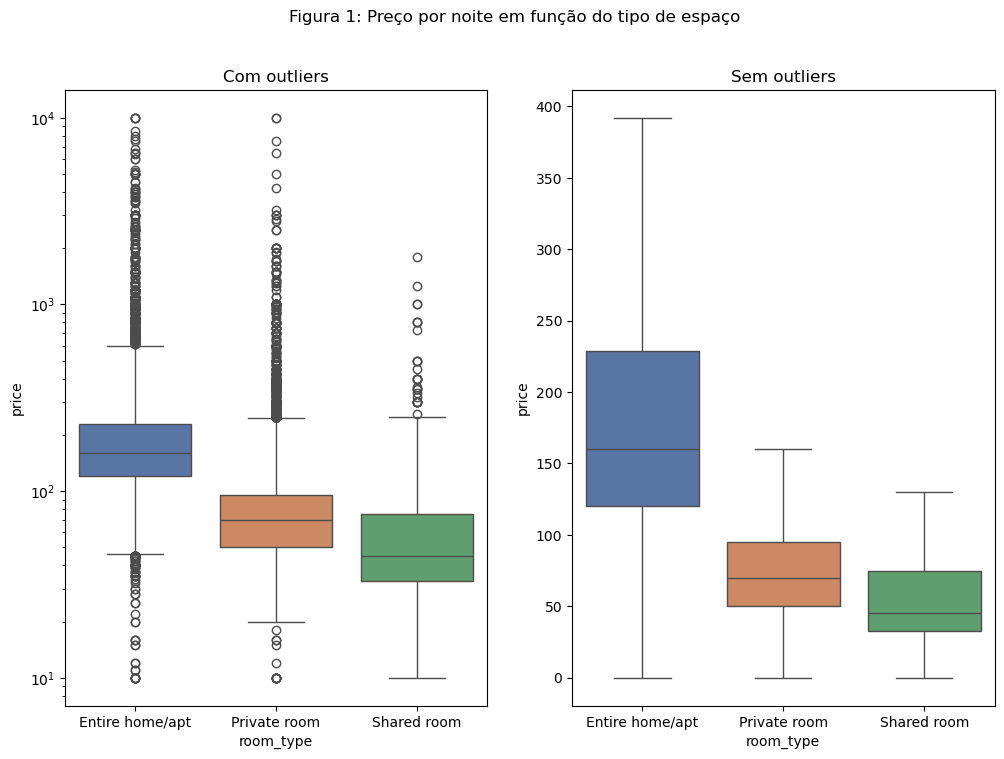

In [104]:
# Boxplot Pre√ßo x Tipo de espa√ßo
fig, ax = plt.subplots(ncols=2, figsize=(12,8))
ax[0].set_title('Com outliers')
ax[0].set_yscale('log')
ax[1].set_title('Sem outliers')
sn.boxplot(data=df, x='room_type', y='price', ax=ax[0], palette='deep')
sn.boxplot(data=df, x='room_type', y='price', ax=ax[1], showfliers=False, palette='deep')
fig.suptitle('Figura 1: Pre√ßo por noite em fun√ß√£o do tipo de espa√ßo')


---
### Hip√≥tese 2: A localiza√ß√£o (Bairros) deve influenciar os pre√ßos (L√≥gica da oferta e demanda)

√â esperado que:

- Regi√µes centrais ou tur√≠sticas (como Manhattan) tenham pre√ßos, em m√©dia, mais elevados
- Regi√µes mais afastadas dos centros (como Bronx e Staten Island) tenham pre√ßos mais baixos

Para avaliar essa hip√≥tese, foi realizado o plot de um Heatmap de localiza√ß√£o dos im√≥veis no estado de Nova Iorque pelo pre√ßo (Figura 2) e a distribui√ß√£o de pre√ßos por bairro por meio de boxplots (Figura 3).

In [11]:
# Descartando os outliers
df_ = df[df['price'] < df['price'].quantile(0.95)]

# Centroids de cada bairro para adicionar o nome dos bairros no mapa
bairro_ny = pd.DataFrame({
    'latitude': [40.776, 40.650, 40.742, 40.579, 40.837], 
    'longitude': [-73.971, -73.949, -73.769, -74.152, -73.865],
    'city': ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']
})

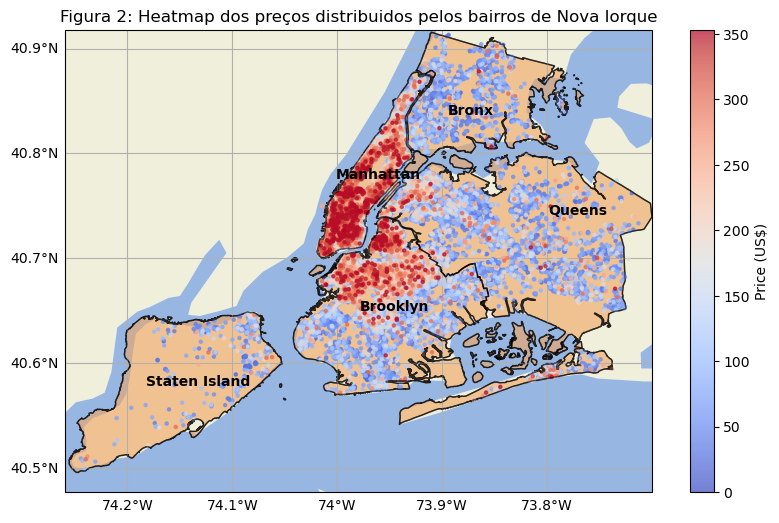

In [164]:
# Obtendo o shapefile do Estado de Nova Iorque usando Geopandas e o Geodatasets
gny = gpd.read_file(gds.get_path("nybb"))

# Iniciando a figura com proje√ß√£o do Cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Definindo limites da √°rea de Nova York
ax.set_extent([-74.2591, -73.7004, 40.4774, 40.9176], crs=ccrs.PlateCarree())
ax.set_title('Figura 2: Heatmap dos pre√ßos distribuidos pelos bairros de Nova Iorque')

# Ordenando o dataframe pela coluna de pre√ßos para evidenciar melhor as regi√µes de altos pre√ßos no Heatmap 
df_ = df_.sort_values(by='price')

# Heatmap
sc = ax.scatter(df_['longitude'], df_['latitude'], c=df_['price'], cmap='coolwarm', alpha=0.7, s=5,zorder=10, transform=ccrs.PlateCarree())

# Adicionando o nome dos bairros
for i in range(len(bairro_ny)):
    ax.text(bairro_ny['longitude'][i]-0.03,
            bairro_ny['latitude'][i],
            bairro_ny['city'][i], 
            fontsize=10, fontweight='bold',
            ha='left',
            transform=ccrs.PlateCarree(), zorder=30)

gny.to_crs(ccrs.PlateCarree()).plot(alpha=0.6, edgecolor="k", ax=ax, facecolor='sandybrown', zorder=1, lw=1)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
gny.to_crs(ccrs.PlateCarree()).plot(alpha=0.6, edgecolor="k", ax=ax, facecolor='None', zorder=20) # Coloquei novamente para refor√ßar as linhas divis√≥rias do mapa

plt.colorbar(sc, ax=ax, label="Price (US$)")
ax.gridlines(draw_labels={"bottom": "x", "left": "y"})


---
A an√°lise da Figura 2 confirma a expectativa de que os alugu√©is mais caros est√£o concentrados em Manhattan e no norte do Brooklyn, especialmente nas √°reas pr√≥ximas √† divisa com Manhattan. Por outro lado, regi√µes mais afastadas, como Staten Island, Bronx, Queens e o sul do Brooklyn, apresentam os pre√ßos mais baixos.

Al√©m disso, o gr√°fico da Figura 3 evidencia a hierarquia dos bairros mais caros, com Manhattan liderando, seguido por Brooklyn, Queens, Staten Island e, por √∫ltimo, o Bronx. Essa classifica√ß√£o √© baseada na assimetria da distribui√ß√£o dos pre√ßos em rela√ß√£o √† mediana e no comprimento das caixas do boxplot. Ou seja, quanto maior a assimetria para cima da mediana, mais concentrados est√£o os altos valores dos pre√ßos. Al√©m disso, caixas mais longas indicam uma maior variabilidade dos pre√ßos dentro do intervalo interquartil, sugerindo uma distribui√ß√£o mais ampla de valores elevados.

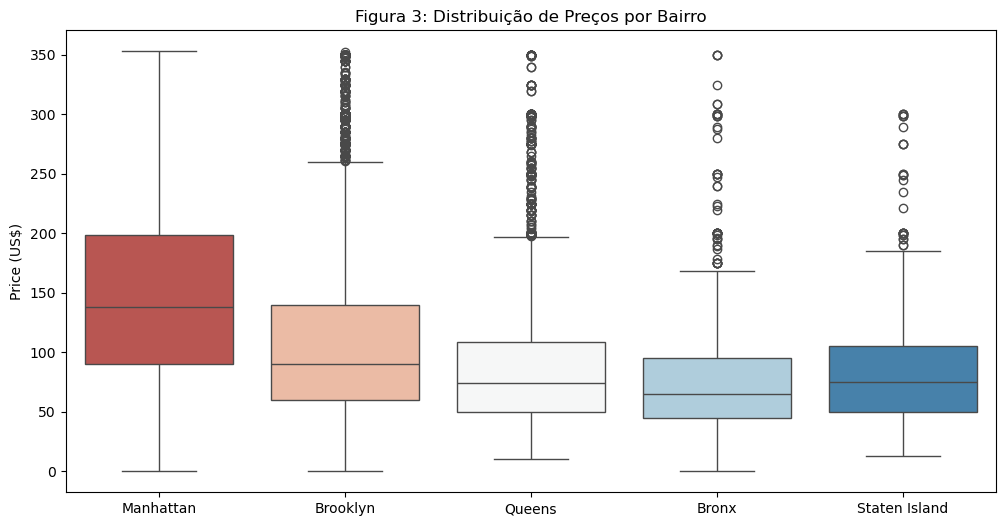

In [142]:
plt.figure(figsize=(12, 6))
sn.boxplot(data=df_.sort_values(by='price', ascending=False), x='bairro_group', y='price', palette='RdBu')
plt.title("Figura 3: Distribui√ß√£o de Pre√ßos por Bairro")
plt.xlabel("")
plt.ylabel("Price (US$)")
plt.show()


---
### Hip√≥tese 3: A avalia√ß√£o do Im√≥vel pode indicar maiores demandas (L√≥gica da oferta e demanda)

√â esperado que:

- An√∫ncios com muitos reviews sejam indicativos de alta procura, o que pode resultar em pre√ßos mais competitivos.
- An√∫ncios com poucas avalia√ß√µes representem acomoda√ß√µes novas ou pouco atrativas.
- A frequ√™ncia de avalia√ß√µes mensais pode refletir duas din√¢micas distintas:
    1. Alta demanda e pre√ßos elevados: Se um im√≥vel recebe muitas avalia√ß√µes por m√™s, √© prov√°vel que seja bem localizado e tenha um bom custo-benef√≠cio, justificando pre√ßos mais altos.
    2. Alta demanda devido a pre√ßos baixos: Caso o pre√ßo seja muito competitivo, ele pode atrair mais h√≥spedes, aumentando a quantidade de reviews mensais.
 

Para testar essas hip√≥teses, analisou-se a rela√ß√£o entre o n√∫mero total de avalia√ß√µes (reviews) e a frequ√™ncia de avalia√ß√µes por m√™s com o pre√ßo do espa√ßo (Figuras 4 e 5).
Os resultados da Figura 4 mostram que im√≥veis com poucas avalia√ß√µes apresentam grande variabilidade nos pre√ßos. No entanto, √† medida que o n√∫mero de avalia√ß√µes aumenta, a amplitude da variabilidade dos pre√ßos tendem a diminuir, sugerindo um comportamento competitivo no mercado, onde os hosts ajustam os valores para atrair mais clientes.
Esse mesmo padr√£o √© observado na Figura 5, onde a variabilidade dos pre√ßos diminui conforme cresce a frequ√™ncia de avalia√ß√µes mensais. Essa tend√™ncia indica que acomoda√ß√µes com um maior hist√≥rico de avalia√ß√µes podem estar mais alinhadas √†s expectativas de pre√ßo dos consumidores.

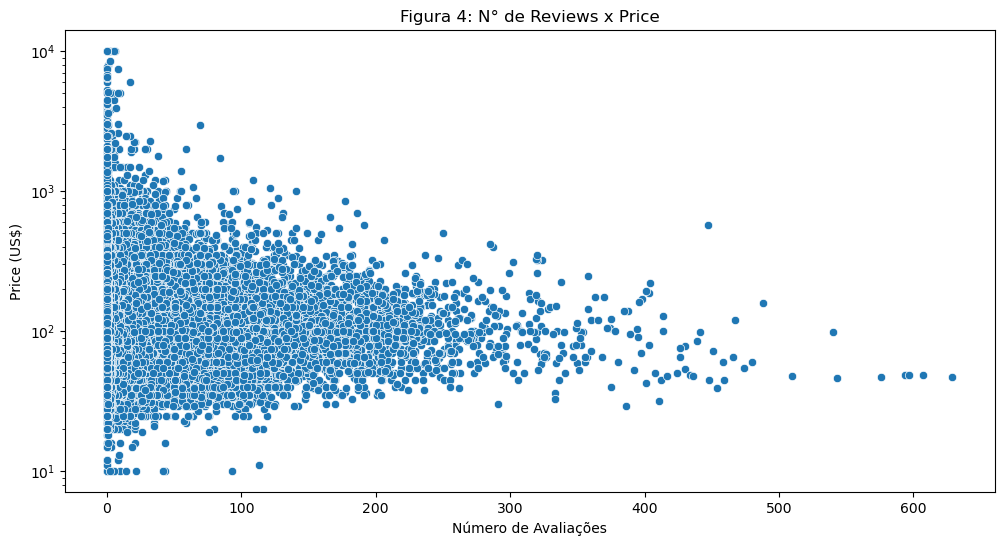

In [34]:
plt.figure(figsize=((12,6)))
sn.scatterplot(data=df, x='numero_de_reviews', y='price', alpha=1)
plt.title("Figura 4: N¬∞ de Reviews x Price")
plt.xlabel("N√∫mero de Avalia√ß√µes")
plt.ylabel("Price (US$)")
plt.yscale("log")


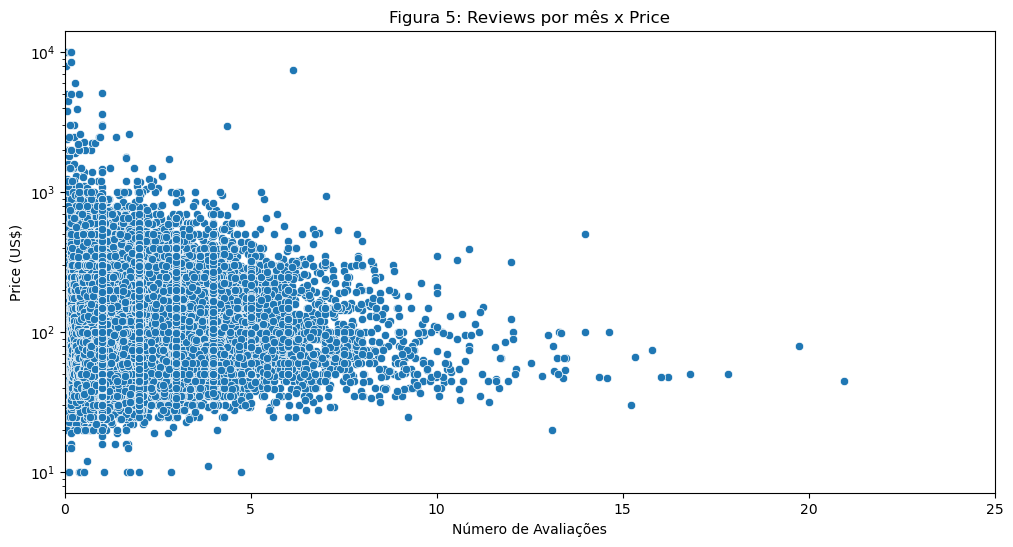

In [38]:
plt.figure(figsize=((12,6)))
sn.scatterplot(data=df, x='reviews_por_mes', y='price', alpha=1)
plt.title("Figura 5: Reviews por m√™s x Price")
plt.xlabel("N√∫mero de Avalia√ß√µes")
plt.ylabel("Price (US$)")
plt.yscale("log")
plt.xlim([0, 25])

---
### Hip√≥tese 4: Alta disponibilidade anual pode diminuir os valores dos pre√ßos (L√≥gica da oferta e demanda)

√â esperado que:
- Espa√ßos com alta disponibilidade ao longo do ano tendam a ter pre√ßos mais baixos, pois os hosts buscam manter uma alta taxa de ocupa√ß√£o, muitas vezes reduzindo os valores para atrair mais reservas.
  
- Espa√ßos com pouca disponibilidade podem apresentar pre√ßos mais elevados, uma vez que s√£o mais exclusivos, e consequentemente mais valorizados no mercado.

Essa din√¢mica reflete a rela√ß√£o entre oferta e demanda, onde a escassez de disponibilidade pode justificar pre√ßos mais altos.

Para avaliar essa hip√≥tese, foi analisada a dispers√£o entre a vari√°vel disponibilidade_365 e o pre√ßo (price), com o objetivo de observar a rela√ß√£o entre ambas (Figura 6). A an√°lise do gr√°fico de dispers√£o permite verificar se h√° uma tend√™ncia de redu√ß√£o nos pre√ßos √† medida que a disponibilidade anual aumenta, corroborando a hip√≥tese de que hosts ajustam os valores para maximizar a ocupa√ß√£o de seus im√≥veis. Por outro lado, a Figura 6 apresenta uma grande variabilidade em toda a escala de disponibilidade anual, indicando que deve haver alguns hosts que mesmo com alta disponibilidade, mant√™m pre√ßos mais altos devido a fatores como localiza√ß√£o privilegiada, comodidades exclusivas ou reputa√ß√£o do an√∫ncio.

Com isso em mente, a an√°lise foi segmentada por tipo de im√≥vel e por localiza√ß√£o (Figuras 7 e 8, respectivamente). No entanto, mesmo com essa segmenta√ß√£o, n√£o foi observada uma rela√ß√£o clara entre a disponibilidade e o pre√ßo. Em todos os casos, os pre√ßos apresentam uma grande variabilidade em toda a escala da vari√°vel disponibilidade_365, independentemente do tipo de im√≥vel ou da localiza√ß√£o. Isso indica que a disponibilidade anual, por si s√≥, n√£o √© um fator determinante para a precifica√ß√£o.

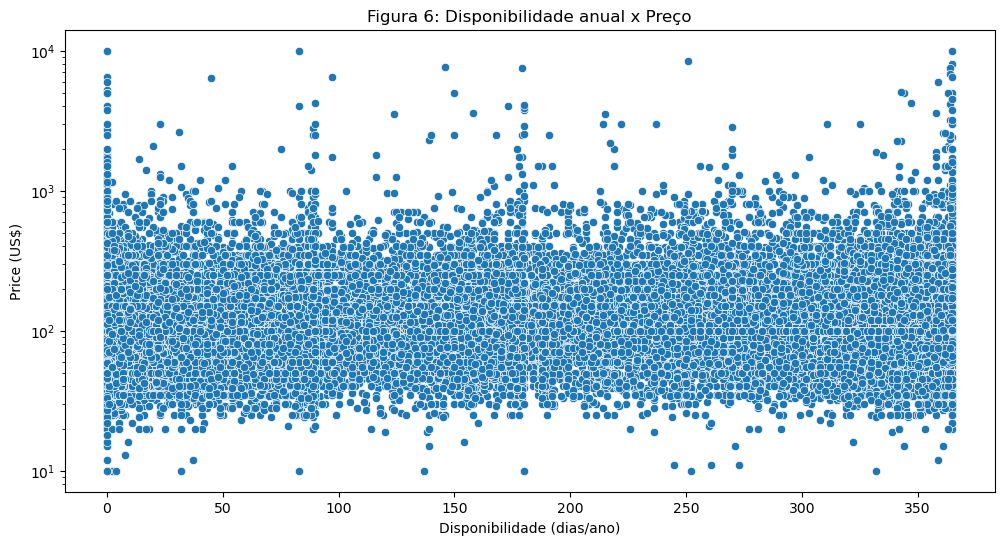

In [54]:
plt.figure(figsize=((12,6)))
sn.scatterplot(data=df, x='disponibilidade_365', y='price', alpha=1)
plt.title("Figura 6: Disponibilidade anual x Pre√ßo")
plt.xlabel("Disponibilidade (dias/ano)")
plt.ylabel("Price (US$)")
plt.yscale("log")

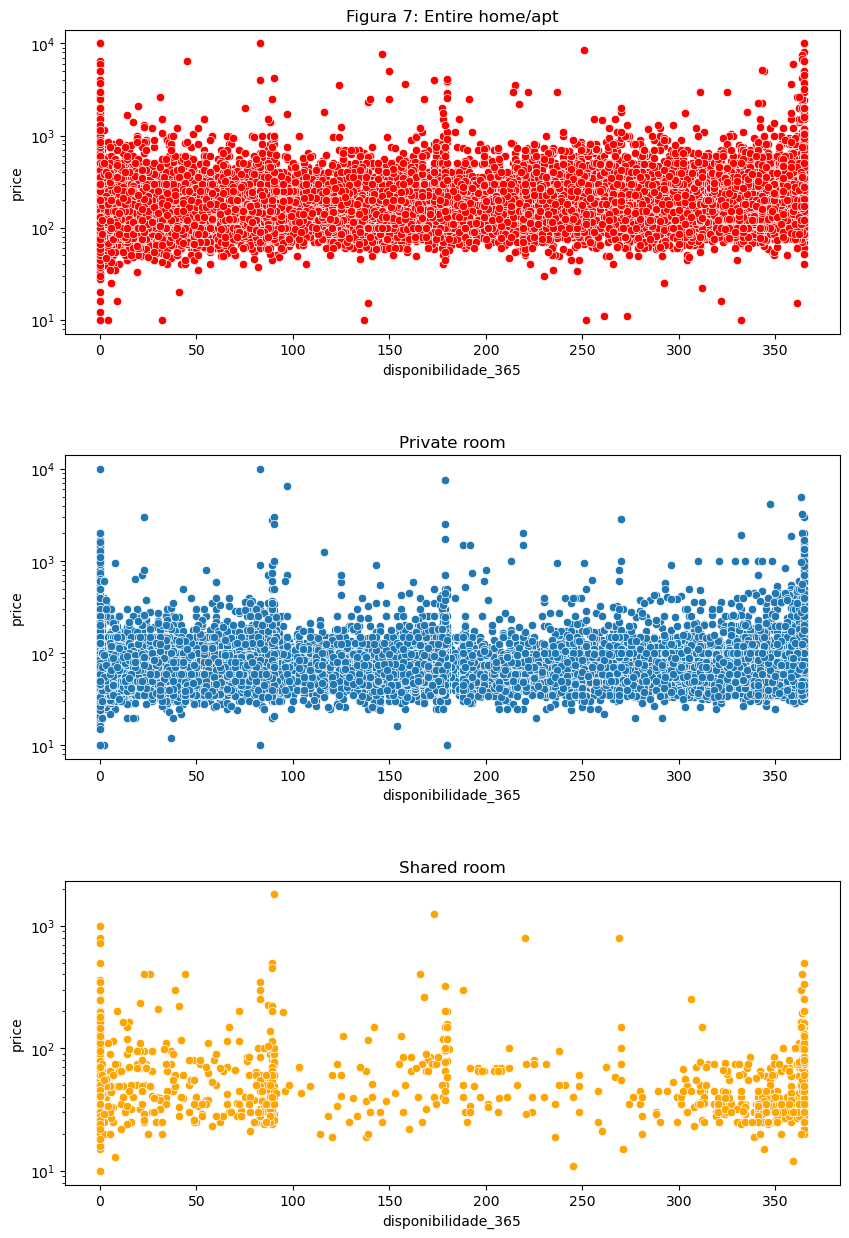

In [56]:
fig, ax = plt.subplots(nrows=3, figsize = (10,15))

sn.scatterplot(ax=ax[0], color='red',
               data=df[df['room_type']=='Entire home/apt'],
               x='disponibilidade_365', y='price', alpha=1)
ax[0].set_title('Figura 7: Entire home/apt')
ax[0].set_yscale('log')

sn.scatterplot(ax=ax[1],
               data=df[df['room_type']=='Private room'],
               x='disponibilidade_365', y='price', alpha=1)
ax[1].set_title('Private room')
ax[1].set_yscale('log')

sn.scatterplot(ax=ax[2], color='orange',
               data=df[df['room_type']=='Shared room'],
               x='disponibilidade_365', y='price', alpha=1)
ax[2].set_title('Shared room')
ax[2].set_yscale('log')
plt.subplots_adjust(hspace=0.4)

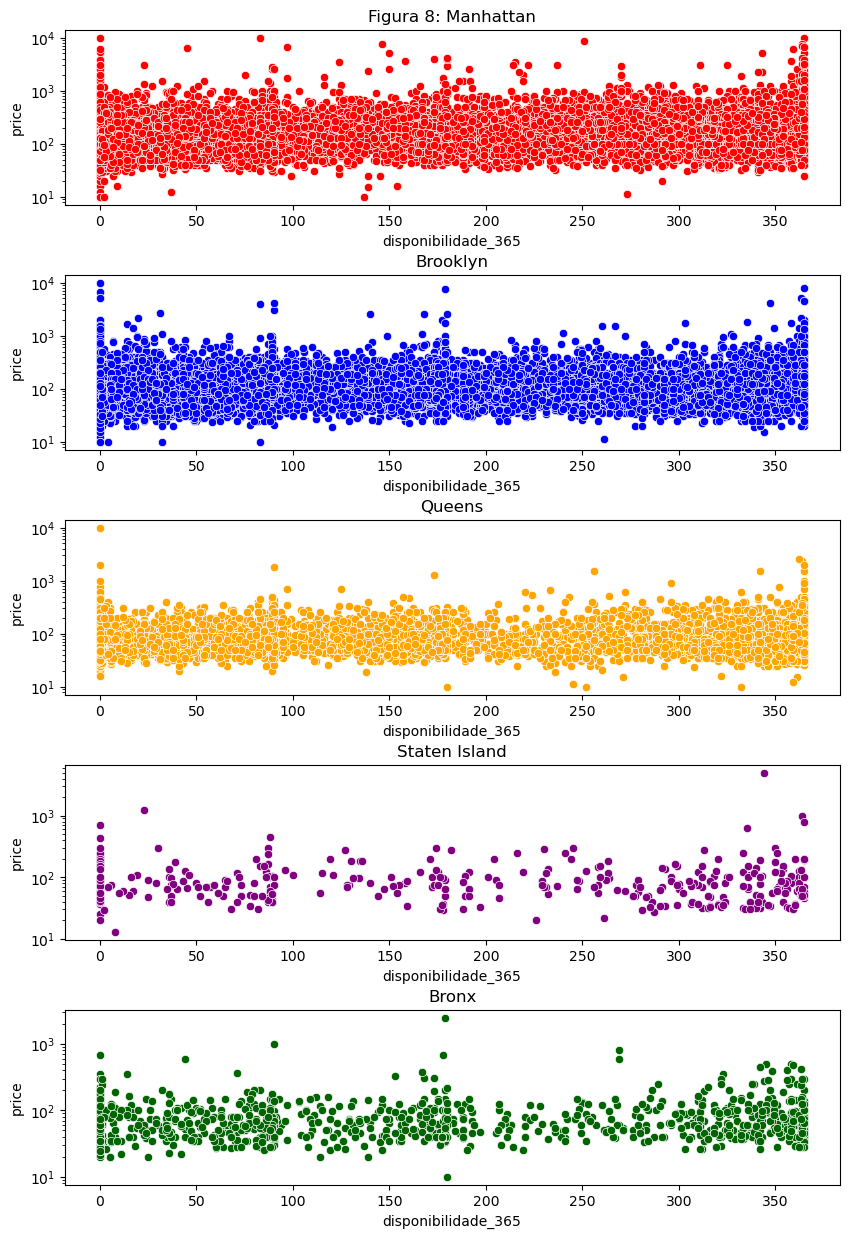

In [58]:
fig, ax = plt.subplots(nrows=5, figsize = (10,15))

cities = list(bairro_ny.city)
color = ['red', 'blue', 'orange', 'purple', 'darkgreen']

for i in range(len(cities)):
    sn.scatterplot(ax=ax[i], color=color[i],
               data=df[df['bairro_group']==cities[i]],
               x='disponibilidade_365', y='price', alpha=1)
    if i ==0:
        ax[i].set_title('Figura 8: Manhattan')
    else:
        ax[i].set_title(f'{cities[i]}')
    ax[i].set_yscale('log')

plt.subplots_adjust(hspace=0.4)

---
### Hip√≥tese 5: M√≠nimo de noites x Pre√ßo

√â esperado que:

- M√≠nimos de noites mais baixos (como minimo_noites = 1) que deveriam estar associados a pre√ßos mais baixos, pois esses im√≥veis tendem a atender turistas em estadias curtas, com foco em maior rotatividade e ocupa√ß√£o, podem ter uma alta amplitude de varia√ß√£o de pre√ßos devido a diversidade de tipos de im√≥veis.

-A amplitude da distribui√ß√£o dos pre√ßos diminuem conforme o n√∫mero m√≠nimo de noites exigido cresce, com uma poss√≠vel estabiliza√ß√£o para estadias muito longas.

Para avaliar essa hip√≥tese, foi analisada a rela√ß√£o entre o n√∫mero m√≠nimo de noites e o pre√ßo ofertado (Figura 9). Os resultados confirmam razoavelmente as expectativas levantadas, evidenciando uma leve redu√ß√£o na amplitude da distribui√ß√£o dos pre√ßos conforme aumenta o requisito de estadia m√≠nima, especialmente em regi√µes mais afastadas do centro de Nova Iorque.

Al√©m disso, a Figura 10 refor√ßa a hip√≥tese de que im√≥veis com menor exig√™ncia de noites m√≠nimas tendem a ter pre√ßos mais baixos.o.

(0.0, 600.0)

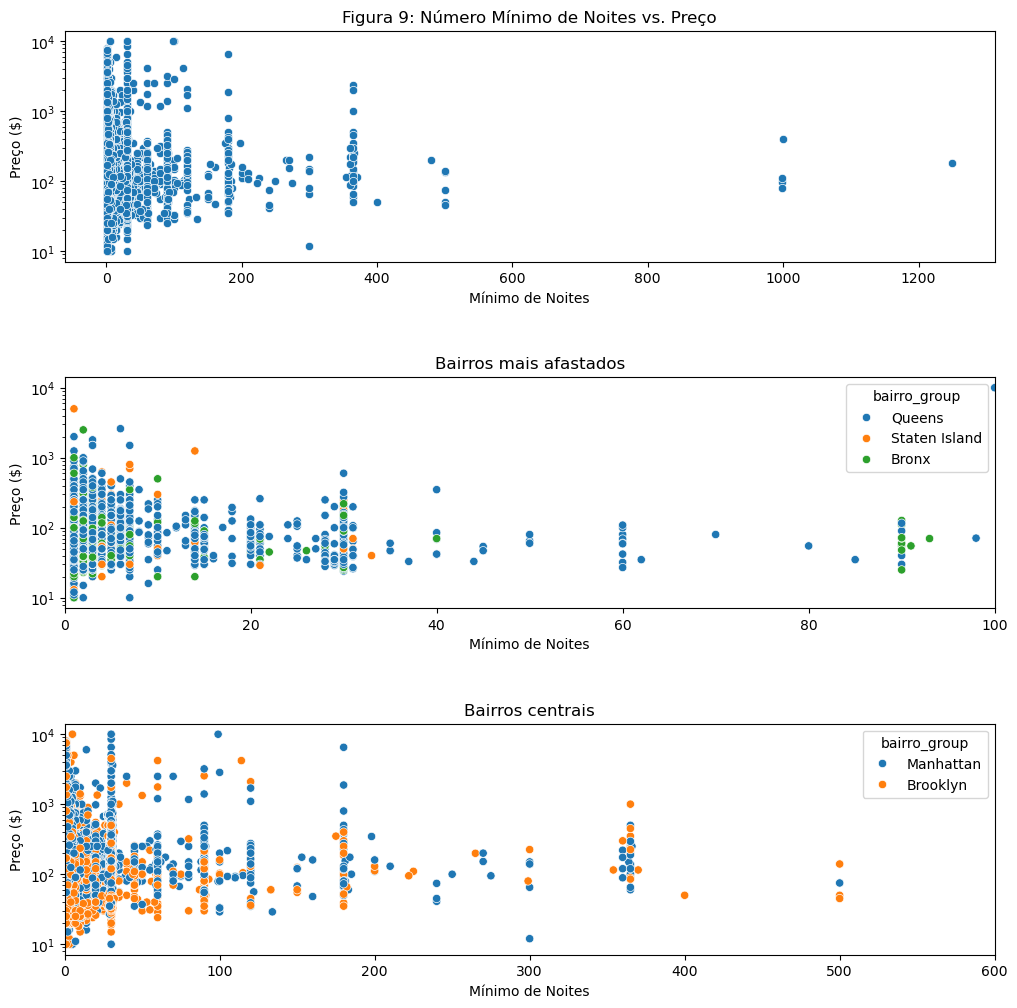

In [149]:
fig, ax = plt.subplots(nrows=3, figsize=(12,12))
fig.subplots_adjust(hspace=0.5)

sn.scatterplot(ax=ax[0], data=df, x='minimo_noites', y='price', alpha=1)
ax[0].set_title("Figura 9: N√∫mero M√≠nimo de Noites vs. Pre√ßo")
ax[0].set_xlabel("M√≠nimo de Noites")
ax[0].set_ylabel("Pre√ßo ($)")
ax[0].set_yscale("log")

sn.scatterplot(ax=ax[1], 
               data=df[(df.bairro_group == 'Queens') | 
                        (df.bairro_group == 'Bronx') | 
                        (df.bairro_group == 'Staten Island')],
               x='minimo_noites', y='price', hue='bairro_group', alpha=1)

ax[1].set_title("Bairros mais afastados")
ax[1].set_xlabel("M√≠nimo de Noites")
ax[1].set_ylabel("Pre√ßo ($)")
ax[1].set_yscale("log")
ax[1].set_xlim(0, 100)  

sn.scatterplot(ax=ax[2], 
               data=df[(df.bairro_group != 'Queens') & 
                        (df.bairro_group != 'Bronx') & 
                        (df.bairro_group != 'Staten Island')],
               x='minimo_noites', y='price', hue='bairro_group', alpha=1)

ax[2].set_title("Bairros centrais")
ax[2].set_xlabel("M√≠nimo de Noites")
ax[2].set_ylabel("Pre√ßo ($)")
ax[2].set_yscale("log")
ax[2].set_xlim(0, 600)  


Text(0.5, 0, 'M√≠nimo de Noites')

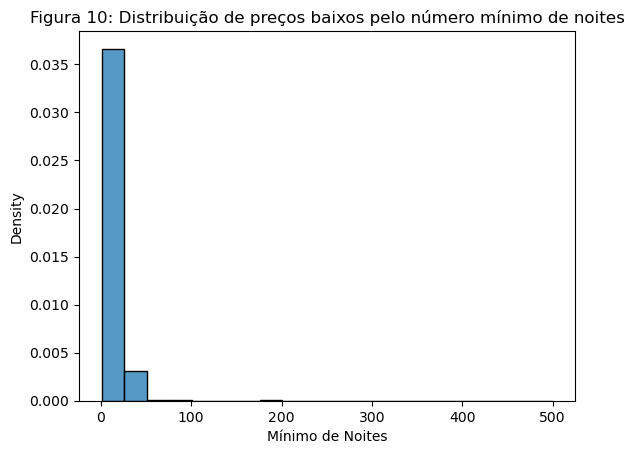

In [180]:
df1 = df[df['price'] < df['price'].quantile(0.99)]
fig, ax = plt.subplots(nrows=1)
fig.subplots_adjust(hspace=0.5)

price_low = df.price.quantile(0.3)

sn.histplot(ax=ax, data=df[df.price <= price_low], x='minimo_noites', stat='density', bins=20)
ax.set_title("Figura 10: Distribui√ß√£o de pre√ßos baixos pelo n√∫mero m√≠nimo de noites")
ax.set_xlabel("M√≠nimo de Noites")


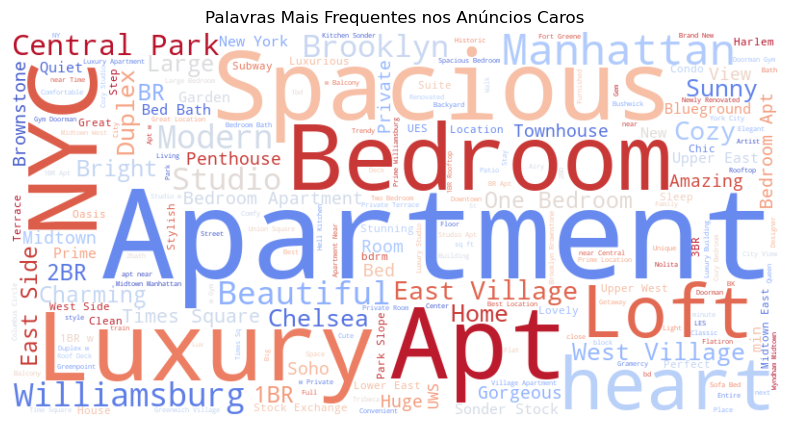

In [184]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filtra os an√∫ncios mais caros (exemplo: acima do 75¬∫ percentil)
high_price = df[df['price'] > df['price'].quantile(0.75)]

# Junta os nomes dos an√∫ncios
text = " ".join(high_price['nome'].dropna())

# Gera a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(text)

# Plota a nuvem
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Palavras Mais Frequentes nos An√∫ncios Caros")
plt.show()


In [192]:
from collections import Counter

# Filtra os extremos de pre√ßo
low_price = df[df['price'] < df['price'].quantile(0.25)]
high_price = df[df['price'] > df['price'].quantile(0.95)]

# Conta as palavras mais frequentes
low_words = " ".join(low_price['nome'].dropna()).lower().split()
high_words = " ".join(high_price['nome'].dropna()).lower().split()

low_counter = Counter(low_words)
high_counter = Counter(high_words)

# Mostra as 10 palavras mais comuns para cada faixa de pre√ßo
print("üîπ Top palavras em im√≥veis baratos:", low_counter.most_common(10))
print("üîπ Top palavras em im√≥veis caros:", high_counter.most_common(10))


üîπ Top palavras em im√≥veis baratos: [('room', 5034), ('in', 4736), ('private', 2791), ('bedroom', 1863), ('cozy', 1654), ('to', 1311), ('brooklyn', 1118), ('apartment', 911), ('and', 813), ('spacious', 786)]
üîπ Top palavras em im√≥veis caros: [('in', 541), ('2', 309), ('bedroom', 289), ('luxury', 266), ('loft', 240), ('apartment', 217), ('the', 183), ('with', 170), ('3', 169), ('apt', 167)]


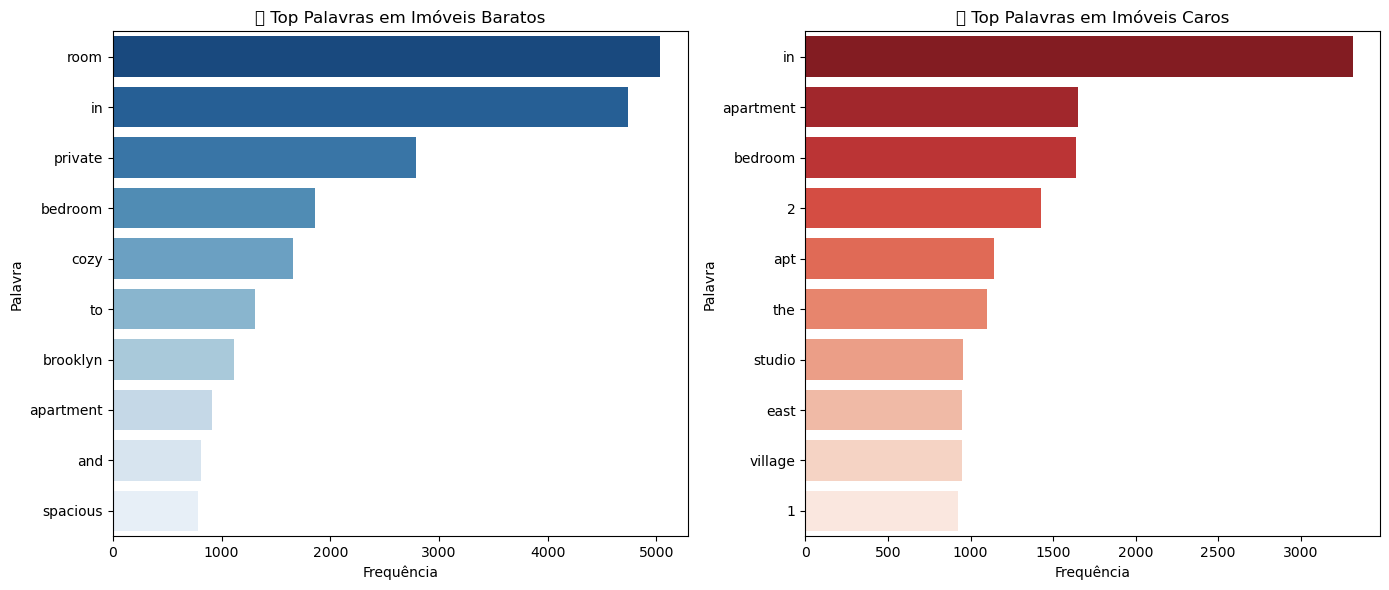

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Fun√ß√£o para contar palavras e transformar em DataFrame
def get_top_words(df, column, n=10):
    words = " ".join(df[column].dropna()).lower().split()
    counter = Counter(words)
    return pd.DataFrame(counter.most_common(n), columns=['Palavra', 'Frequ√™ncia'])

# Dados para im√≥veis baratos e caros
low_price = df[df['price'] < df['price'].quantile(0.25)]
high_price = df[df['price'] > df['price'].quantile(0.75)]

df_low = get_top_words(low_price, 'nome')
df_high = get_top_words(high_price, 'nome')

# Criando a visualiza√ß√£o
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=df_low, y='Palavra', x='Frequ√™ncia', palette='Blues_r', ax=ax[0])
ax[0].set_title("üîπ Top Palavras em Im√≥veis Baratos")

sns.barplot(data=df_high, y='Palavra', x='Frequ√™ncia', palette='Reds_r', ax=ax[1])
ax[1].set_title("üî∫ Top Palavras em Im√≥veis Caros")

plt.tight_layout()
plt.show()


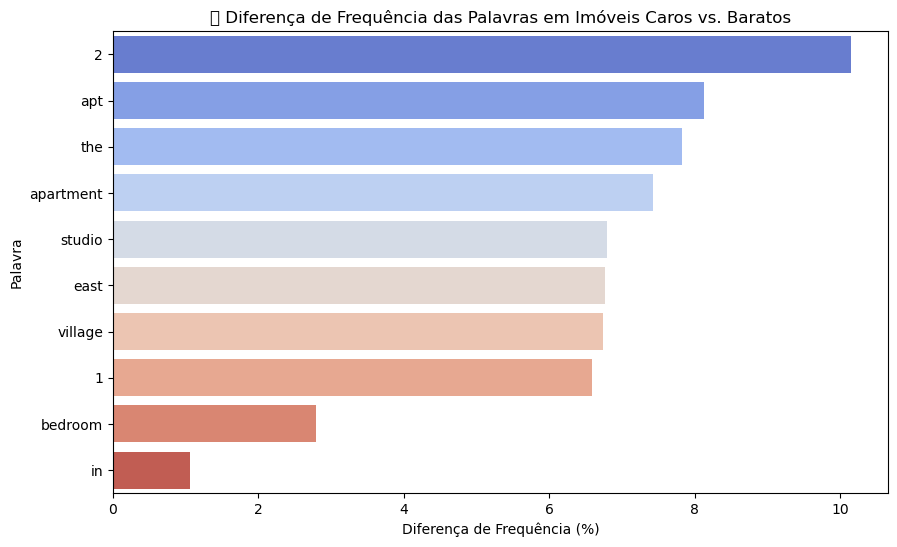

In [190]:
# Calcula frequ√™ncia relativa
df_low['Frequ√™ncia (%)'] = df_low['Frequ√™ncia'] / df_low['Frequ√™ncia'].sum() * 100
df_high['Frequ√™ncia (%)'] = df_high['Frequ√™ncia'] / df_high['Frequ√™ncia'].sum() * 100

# Junta os dois DataFrames
df_compare = pd.merge(df_high, df_low, on='Palavra', how='outer', suffixes=('_caro', '_barato')).fillna(0)

# Calcula a diferen√ßa percentual
df_compare['Diferen√ßa (%)'] = df_compare['Frequ√™ncia (%)_caro'] - df_compare['Frequ√™ncia (%)_barato']
df_compare = df_compare.sort_values('Diferen√ßa (%)', ascending=False)

# Plotando
plt.figure(figsize=(10, 6))
sns.barplot(data=df_compare.head(10), y='Palavra', x='Diferen√ßa (%)', palette='coolwarm')
plt.title("üîπ Diferen√ßa de Frequ√™ncia das Palavras em Im√≥veis Caros vs. Baratos")
plt.xlabel("Diferen√ßa de Frequ√™ncia (%)")
plt.ylabel("Palavra")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DaniloDC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


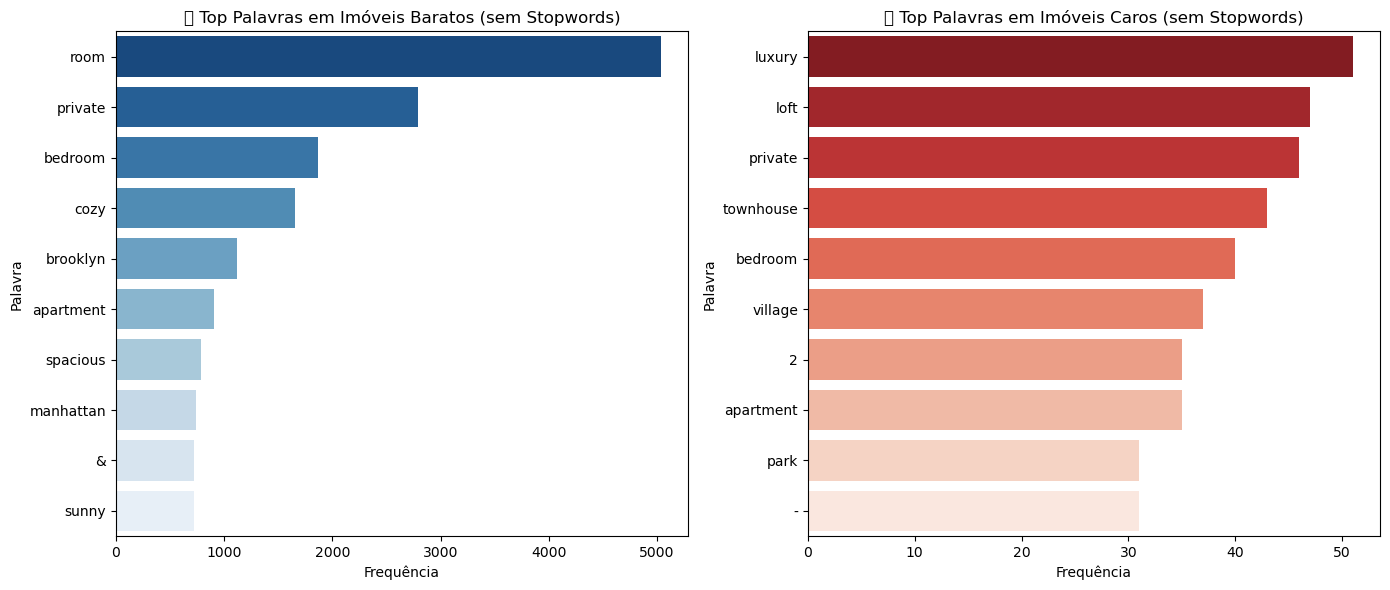

In [200]:
from nltk.corpus import stopwords
import nltk

# Baixar stopwords do NLTK (se n√£o tiver instalado)
nltk.download('stopwords')

# Criar lista de stopwords
stop_words = set(stopwords.words('english'))  # Caso o texto seja em portugu√™s

# Fun√ß√£o para contar palavras e remover stopwords
def get_top_words_filtered(df, column, stopwords, n=10):
    words = " ".join(df[column].dropna()).lower().split()
    filtered_words = [word for word in words if word not in stopwords]
    counter = Counter(filtered_words)
    return pd.DataFrame(counter.most_common(n), columns=['Palavra', 'Frequ√™ncia'])

# Dados para im√≥veis baratos e caros
low_price = df[df['price'] < df['price'].quantile(0.25)]
high_price = df[df['price'] > df['price'].quantile(0.99)]

df_low = get_top_words_filtered(low_price, 'nome', stop_words)
df_high = get_top_words_filtered(high_price, 'nome', stop_words)

# Criando a visualiza√ß√£o
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(data=df_low, y='Palavra', x='Frequ√™ncia', palette='Blues_r', ax=ax[0])
ax[0].set_title("üîπ Top Palavras em Im√≥veis Baratos (sem Stopwords)")

sns.barplot(data=df_high, y='Palavra', x='Frequ√™ncia', palette='Reds_r', ax=ax[1])
ax[1].set_title("üî∫ Top Palavras em Im√≥veis Caros (sem Stopwords)")

plt.tight_layout()
plt.show()
